In [2]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

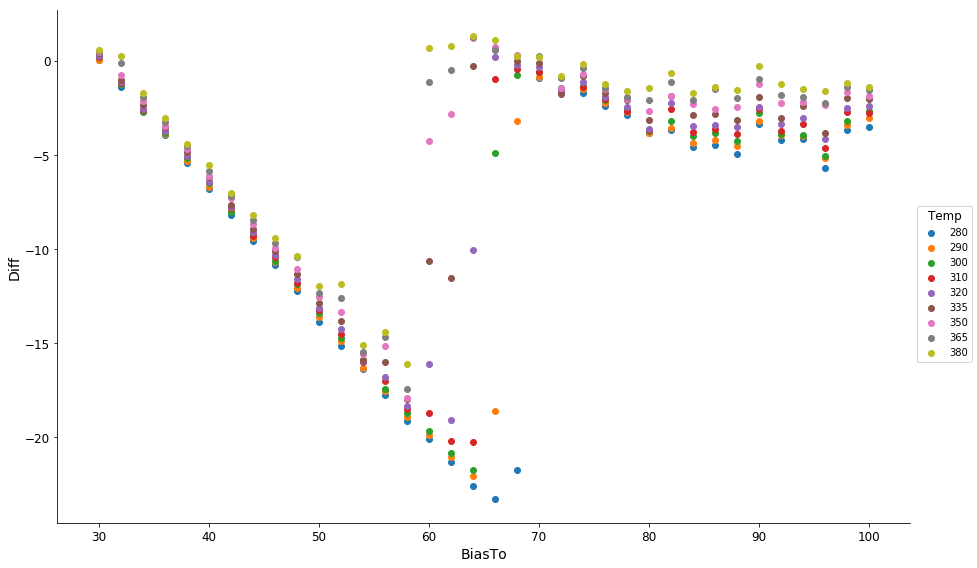

In [21]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/third/force_0.02_rg_0.15_lipid_1.0_mem_1_go_0.8/rerun_1_16_Apr_143519.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun1 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

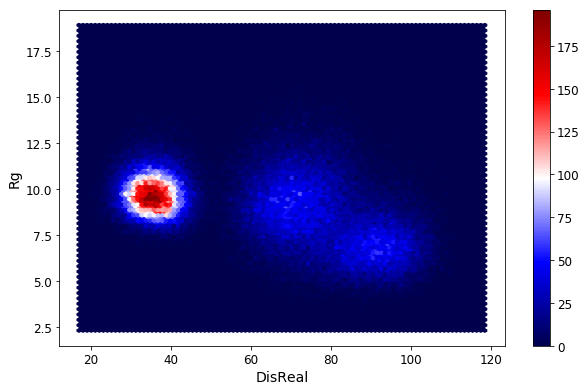

In [22]:
rerun1.query("Temp == 365").plot.hexbin("DisReal", "Rg", cmap="seismic", sharex=False)

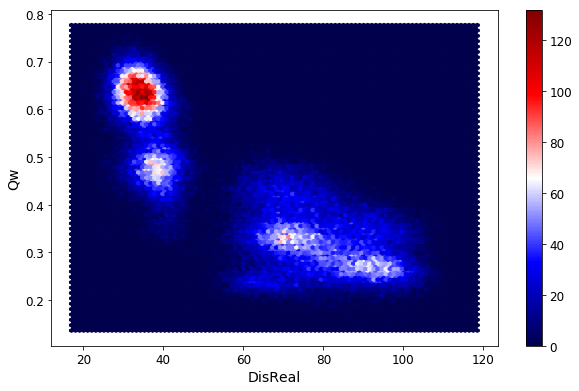

In [31]:
rerun1.query("Temp == 365").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

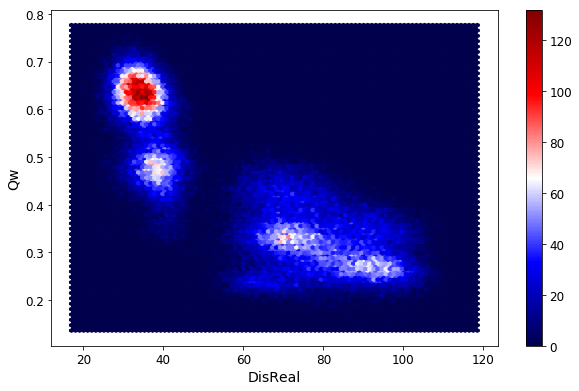

In [23]:
rerun1.query("Temp == 365").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

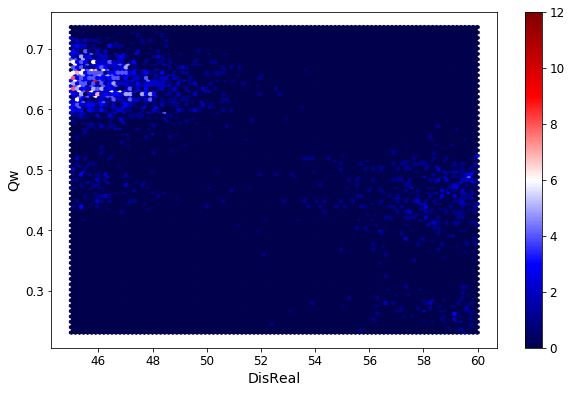

In [7]:
rerun1.query("Temp == 300 and DisReal > 45 and DisReal < 60").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [47]:
pre = "/Users/weilu/Research/server/apr_2018/03_week/all_data_folder/third_with_h56rerun_1_24_Apr_230220.feather"
data = pd.read_feather(pre)

In [48]:
data.columns

Index(['Step', 'Run', 'Temp', 'Qw', 'Energy', 'DisReal', 'Dis_h56',
       'z_average', 'abs_z_average', 'z_h1', 'z_h2', 'z_h3', 'z_h4', 'z_h5',
       'z_h6', 'Distance', 'AMH-Go', 'Membrane', 'Rg', 'rg1', 'rg2', 'rg3',
       'rg4', 'rg5', 'rg6', 'rg_all', 'Lipid', 'Lipid1', 'Lipid2', 'Lipid3',
       'Lipid4', 'Lipid5', 'Lipid6', 'Lipid7', 'Lipid8', 'Lipid9', 'Lipid10',
       'Lipid11', 'Lipid12', 'Lipid13', 'Lipid14', 'Lipid15', 'TotalE',
       'BiasTo'],
      dtype='object')

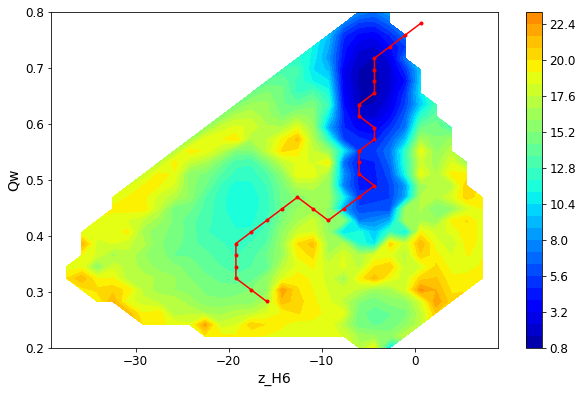

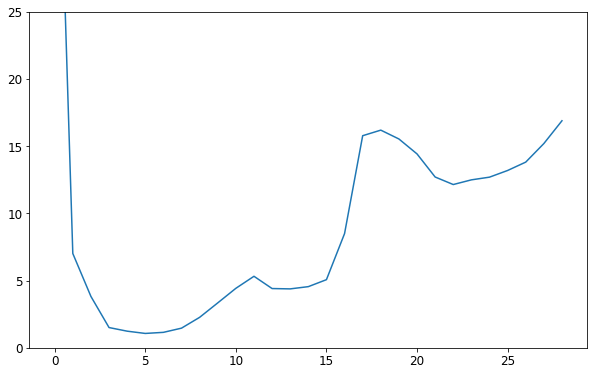

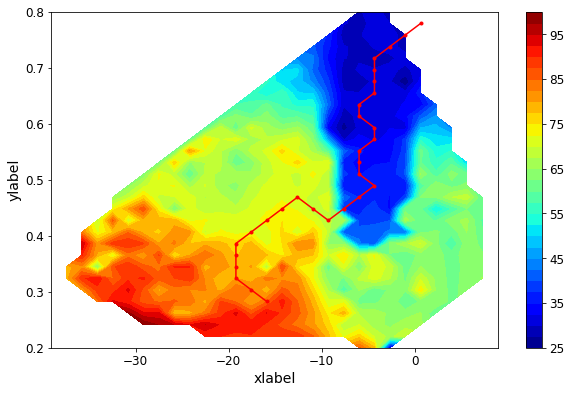

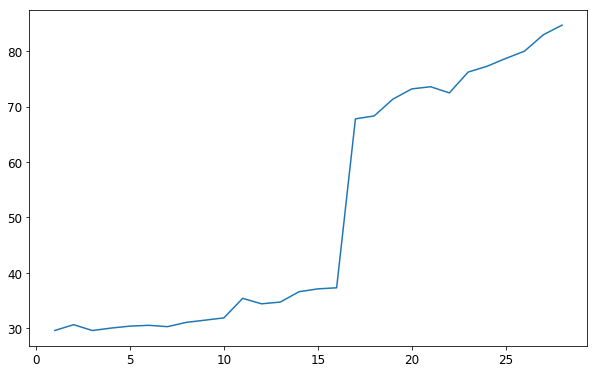

In [42]:
pre = "/Users/weilu/Research/server/apr_2018/02_week"
temp = 310
location = pre + "/third_expectedEnergy/_280-350/2d_z_qw/super_quick/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(28,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

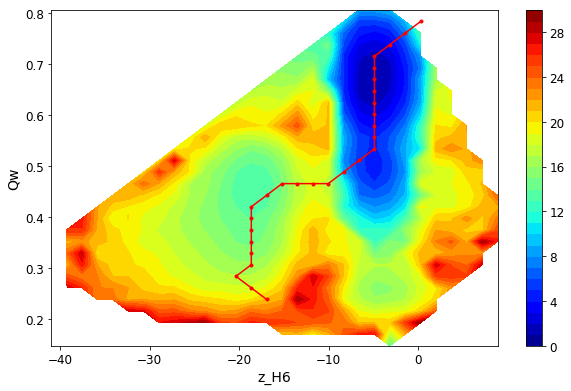

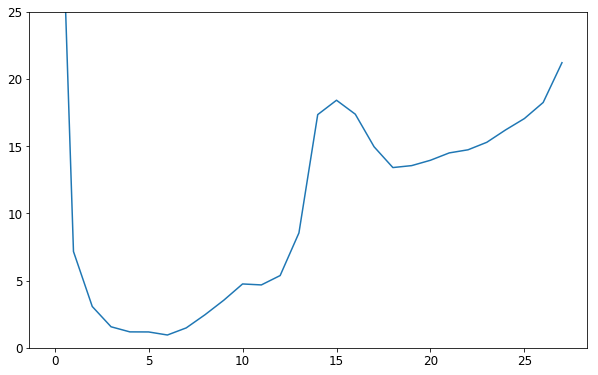

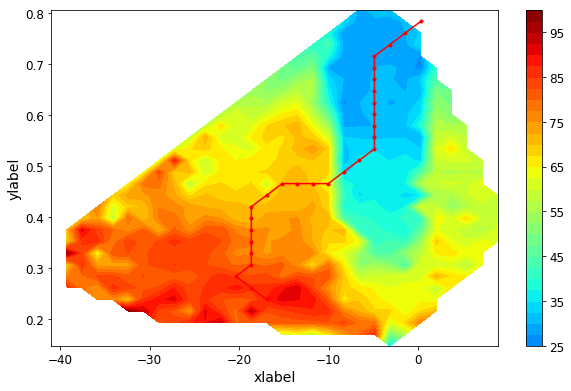

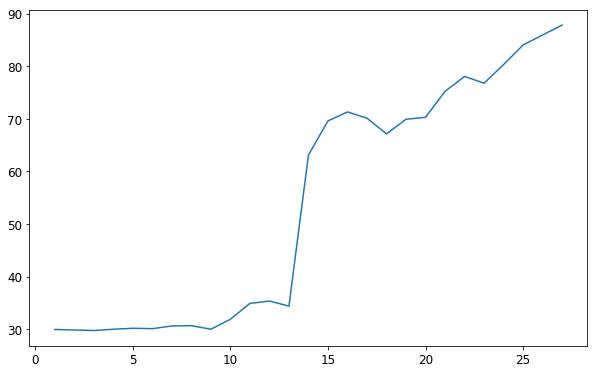

In [17]:
pre = "/Users/weilu/Research/server/apr_2018/02_week"
temp = 310
location = pre + "/third/_280-350/2d_z_qw/force_0.0/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(28,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

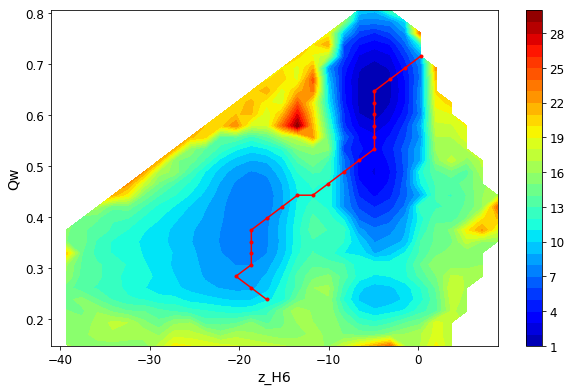

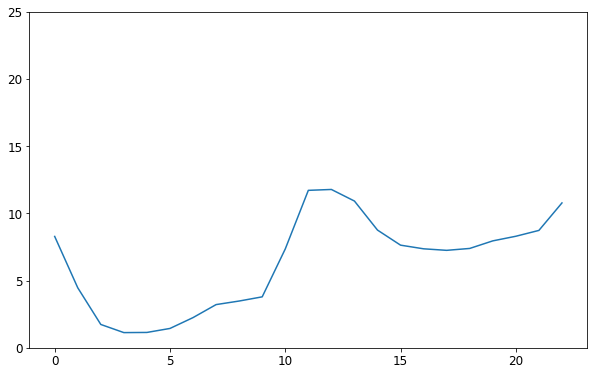

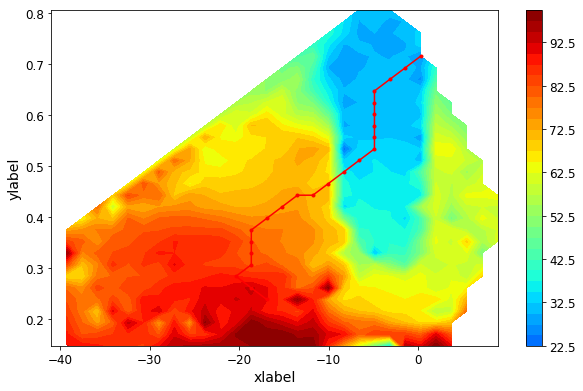

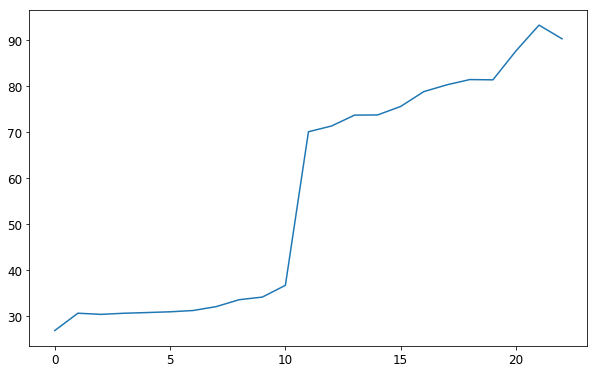

In [36]:
pre = "/Users/weilu/Research/server/apr_2018/02_week"
temp = 340
location = pre + "/third/_280-350/2d_z_qw/force_0.0/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

In [37]:
f

[8.2872653673163601,
 4.4673688155922067,
 1.7365352323838075,
 1.1310359820089964,
 1.1428920539730145,
 1.4403283358320835,
 2.2472848575712119,
 3.2155307346326882,
 3.4803973013493268,
 3.792016491754131,
 7.3559805097451401,
 11.717202398800598,
 11.782916041979011,
 10.920929535232382,
 8.7602338830584667,
 7.6382908545727135,
 7.3663943028485752,
 7.2526536731634179,
 7.3941274362818596,
 7.9572908545727126,
 8.3009775112443762,
 8.7356056971514242,
 10.780898050974512]

In [38]:
f_on_path

[26.941385307346359,
 30.696973013493253,
 30.447131934032985,
 30.68845577211394,
 30.838632683658169,
 31.003184407796098,
 31.281014992503742,
 32.129712143928039,
 33.628517241379306,
 34.193422788605702,
 36.744098950524837,
 70.045364317841091,
 71.290425787106443,
 73.648332833583197,
 73.690346326836561,
 75.531101949025498,
 78.740425787106446,
 80.215896551724128,
 81.360451274362816,
 81.300182908545722,
 87.572427286356799,
 93.164787106446781,
 90.193644677661169]

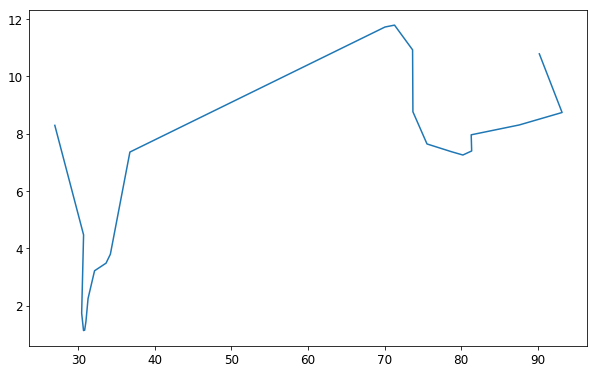

In [41]:
plt.plot(f_on_path, f)

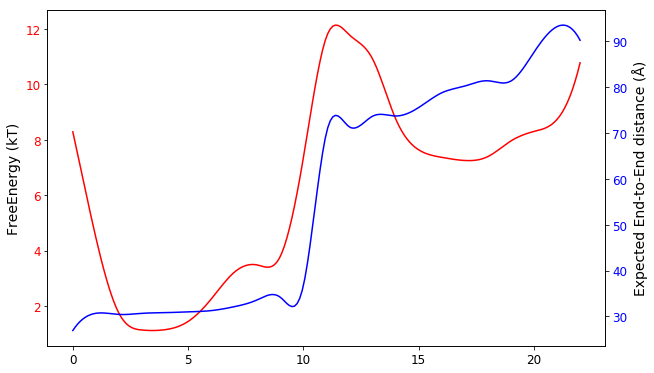

In [39]:
from scipy.interpolate import CubicSpline
import scipy
x = np.array(range(len(f)))
spl1 = scipy.interpolate.interp1d(x, f, kind="cubic")
# plt.plot(x_smooth1, spl1(x_smooth1))
f_on_path
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = scipy.interpolate.interp1d(x, f_on_path, kind="cubic")
# plt.plot(x_smooth, spl(x_smooth))
# Create axes
fig, ax = plt.subplots()
ax1, ax2 = two_scales(ax, x_smooth, spl1(x_smooth), spl(x_smooth), 'r', 'b')

color_y_axis(ax1, 'r')
color_y_axis(ax2, 'b')
# plt.show()
# plt.savefig("/Users/weilu/Dropbox/GlpG_paper_2018/figures/freeEnergy_Distance.png")

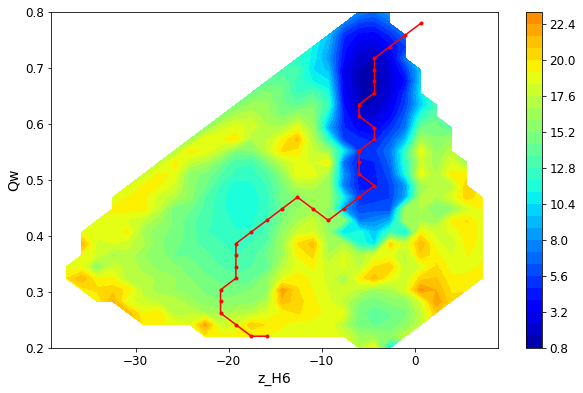

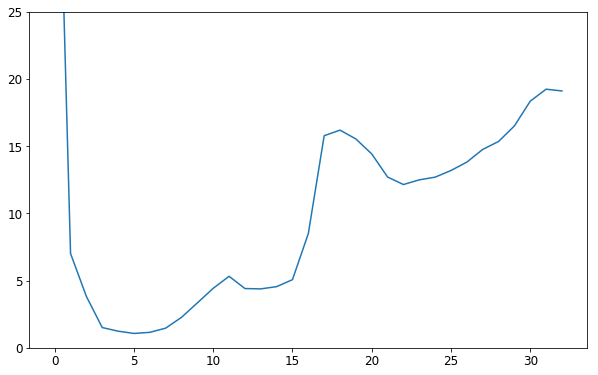

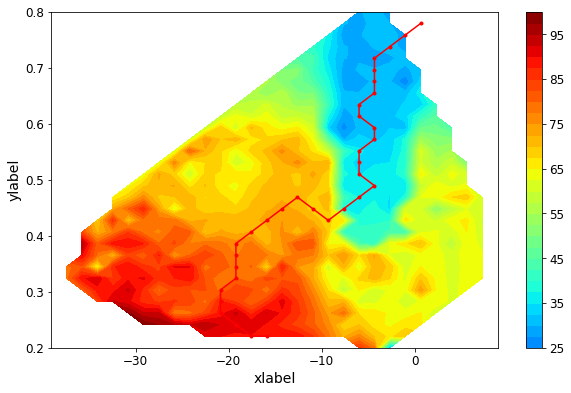

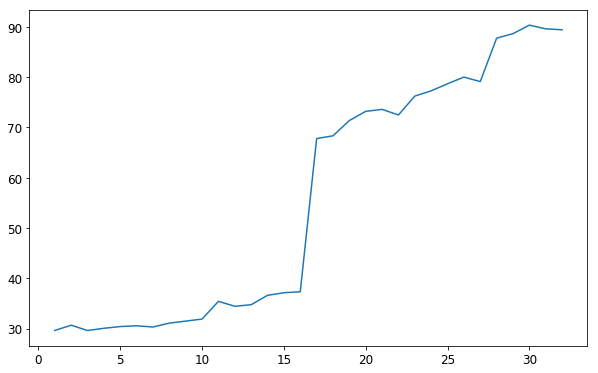

In [27]:
pre = "/Users/weilu/Research/server/apr_2018/02_week"
temp = 310
location = pre + "/third/_280-350/2d_z_qw/quick/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), end=(28,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

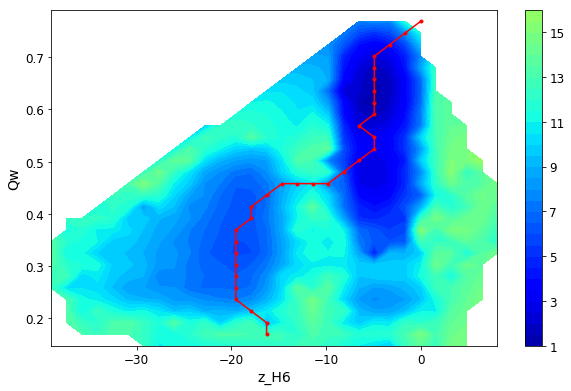

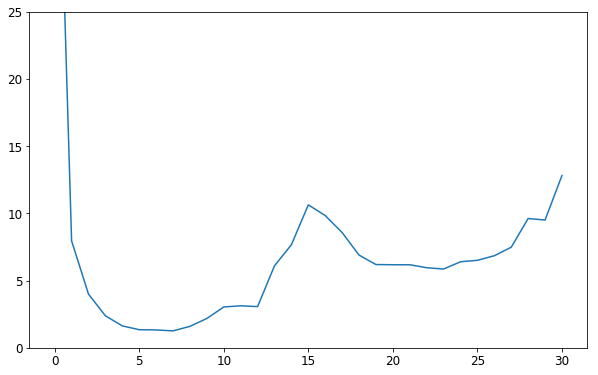

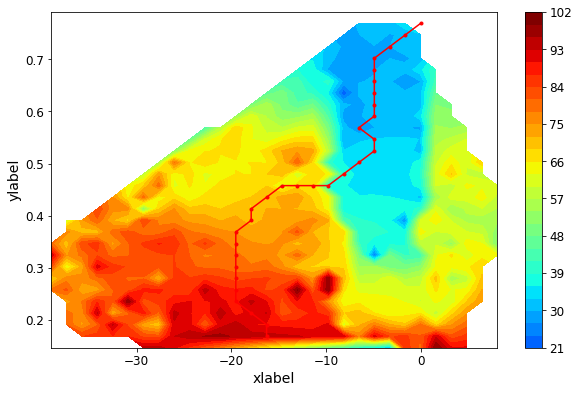

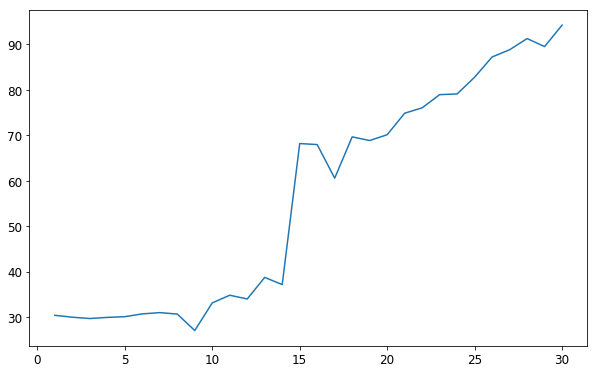

In [30]:
pre = "/Users/weilu/Research/server/apr_2018/02_week"
temp = 360
location = pre + "/third/_280-350/2d_z_qw/temp_350/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), end=(28,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

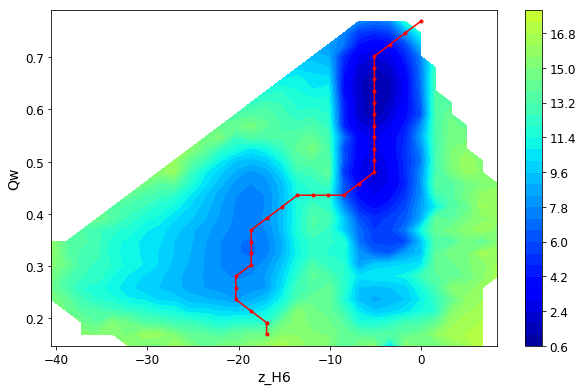

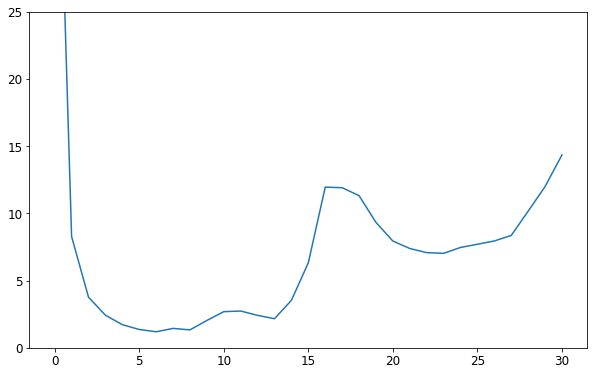

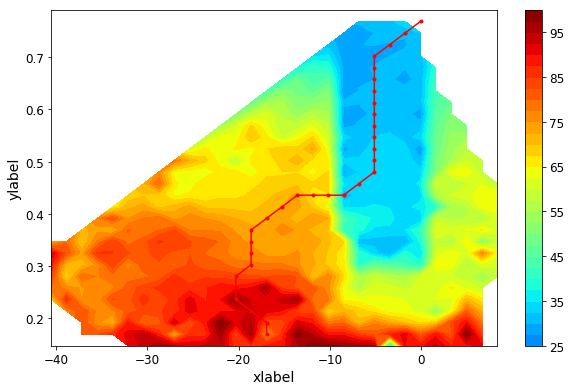

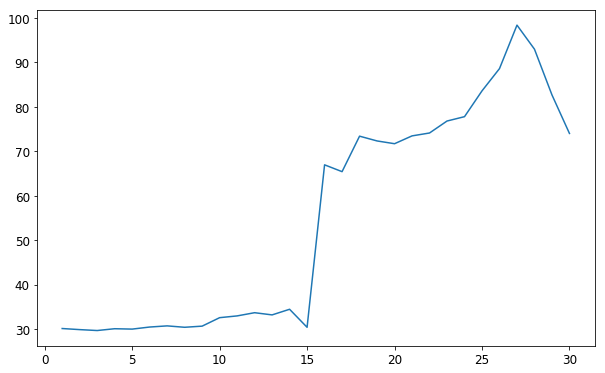

In [32]:
pre = "/Users/weilu/Research/server/apr_2018/02_week"
temp = 360
location = pre + "/third/_280-350/2d_z_qw/temp_350_and_365/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(1, 14), end=(28,24), save=False, xlabel="z_H6", ylabel="Qw")
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=100)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)